1 - Collect All Data

In [4]:
#All the data stored in files variable
import os 
import pandas as pd
files = os.listdir(r'C:\Users\omerf\OneDrive\Masaüstü\Data Analysis Project\Youtube\additional_data')
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [5]:
#Selecting the csv_files
csv_file = [file for file in files if file.endswith(".csv")]
csv_file

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [6]:
full_df = pd.DataFrame()
path = r'C:\Users\omerf\OneDrive\Masaüstü\Data Analysis Project\Youtube\additional_data'

for file in csv_file:
    current_df = pd.read_csv(path + "/" + file, encoding = "iso-8859-1", on_bad_lines = "skip")

    full_df = pd.concat([full_df, current_df], ignore_index= True)

In [7]:
#Category ids
full_df["category_id"].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [8]:
json_df = pd.read_json(r"C:\Users\omerf\OneDrive\Masaüstü\Data Analysis Project\Youtube\additional_data/US_category_id.json")

In [9]:
json_df["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [10]:
#Need title from data

cat_dict = {}

for item in json_df["items"]:
    cat_dict[int(item["id"])] = item["snippet"]["title"]

In [11]:
full_df["category_name"] = full_df["category_id"].map(cat_dict)

2 - Trending Videos Analysis

In [12]:
full_df["channel_title"].value_counts()

channel_title
The Late Show with Stephen Colbert    984
WWE                                   804
Late Night with Seth Meyers           773
VikatanTV                             763
TheEllenShow                          743
                                     ... 
Cleanprincegaming                       1
Phil Jones                              1
PRO ERA                                 1
Samara Redway                           1
EWNetwork                               1
Name: count, Length: 37824, dtype: int64

In [13]:
#Sorting values in descending order
cdf = full_df.groupby(["channel_title"]).size().sort_values(ascending=False).reset_index()

In [14]:
#Rename Column name
cdf = cdf.rename(columns= {0 : "total_videos"})
cdf 

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,Tony Miskatonic,1
37820,Tony Laundrie,1
37821,Tony Castaly Ent. Corp.,1
37822,Tony 14200,1


In [15]:
#Importing plotly for this analysis
import plotly.express as px

In [16]:
px.bar(data_frame=cdf[0:20], x = "channel_title", y = "total_videos")

In [24]:
#Percentage of likes , dislikes and comment counts
full_df["like_rate"] = (full_df["likes"] / full_df["views"]) * 100
full_df["dislike_rate"] = (full_df["dislikes"] / full_df["views"]) * 100
full_df["comment_rate"] = (full_df["comment_count"] / full_df["views"]) * 100

3 - Does punctuations have an impact on views, likes and dislikes?

In [25]:
import string

In [26]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

sample = full_df[0 : 10000]
sample["count_punc"] = sample["title"].apply(punc_count)

C:\Users\omerf\AppData\Local\Temp\ipykernel_17252\1075014883.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



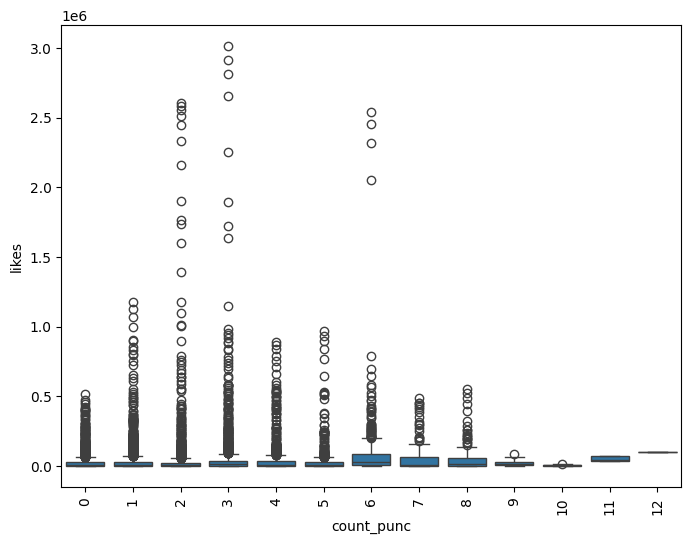

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x="count_punc", y="likes", data = sample)
plt.xticks(rotation = "vertical")
plt.show()

As you can see from the graph if you have 2, 3 punctuations you may have more likes